# "Understanding The Data -- Kovaaks Aim Trainer"
> "A Deep Dive into the automatically saved csvs from Kovaaks Aim Trainer"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Josh Prier
- categories: [Kovaaks, Understanding The Data, Data Science]

# Kovaaks
Kovaaks is a "game" that allows to directly practice mouse control in 3d fps games. There are hundreds of different mini-games to practice with, each having a different focus. 

This [guide](https://www.dropbox.com/s/vaba3potfhf9jy1/KovaaK%20aim%20workout%20routines.pdf?dl=0) is best for getting perspective or understanding how and why to use Kovaaks


# File Names
Kovaaks has a great feature in which it saves every mini-game's stats to a csv. 
The format of the csv's names is as follows
```
<scenario name> - <Challenge or Freeplay> - YYYY.MM.DD-HH.MM.SS Stats.csv
```
Example:
```
Tile Frenzy - Challenge - 2020.12.14-08.46.00 Stats.csv
```

Some of the scenario names also have dashes so just checking against the first dash will not work
```
Tile Frenzy - Strafing - 03 - Challenge - 2020.12.14-08.34.31 Stats.csv
```

# The Data

Each file has 4 parts:
* List of all Kills
* Weapon, shots, hits, damage done, damage possible
* Overall Stats and info 
* Info about settings (input lag, fps, sens, FOV, etc)

In [1]:
#collapse-hide
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen
from io import StringIO
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact

Each part of the data has different formats and headers.
Here are the Headers/keys in python

In [2]:
#collapse-show
keys_kills=["Date","Kill #","Timestamp","Bot","Weapon","TTK","Shots","Hits","Accuracy","Damage Done","Damage Possible","Efficiency","Cheated"]
keys_weapon=["Date","Weapon","Shots","Hits","Damage Done","Damage Possible"]
keys_info=["Date","Kills","Deaths","Fight Time","Avg TTK","Damage Done","Damage Taken","Midairs","Midaired","Directs","Directed","Distance Traveled","Score","Scenario","Hash","Game Version","Challenge Start","Input Lag","Max FPS (config)","Sens Scale","Horiz Sens","Vert Sens","FOV","Hide Gun","Crosshair","Crosshair Scale","Crosshair Color","Resolution","Avg FPS","Resolution Scale"]
keys_info_no_colon=["Resolution","Avg FPS","Resolution Scale"]

In [3]:
#collapse-hide

#HELPERS

def split_format_file(section, output, date):
    split_section = section.split('\n')
#     if output == "":
#         output = split_section[0]
    # TODO: Add date to each line
    for i in range(len(split_section[1:])):
        if split_section[i+1][-1] == ',':
            split_section[i+1] = split_section[i+1][:-1]
        split_section[i+1] = date + "," + split_section[i+1]
    section = '\n'.join(split_section[1:])
    output = output + '\n' + section
    return output


def format_info(info, output, date):
    info_lines = info.split('\n')
    data = []
    for key in keys_info:
        if key == "Date":
            found_key = True
            data.append(date)
        else:
            found_key = False
        for line in info_lines:
            if any(key in line for key in keys_info_no_colon):
                split_line = line.split(',')
                if len(split_line) > 1:
                    if split_line[0] == key:
                        found_key = True
                        data.append(split_line[1])
            else:
                split_line = line.split(':', 1)
                if len(split_line) > 1:
                    if split_line[0] == key:
                        found_key = True
                        data.append(split_line[1][1:])
        if not found_key:
            data.append('')
    output = output + '\n' + ','.join(data)
    return output

In [4]:
#collapse-show

# Current online directory for my stats 
stat_dir = "https://jprier.github.io/stats/"
stat_filenames_url = "https://jprier.github.io/stats/filenames.txt"

stat_filenames = urlopen(stat_filenames_url).read().decode('utf-8').split('\n')

kills = ','.join(keys_kills)
weapon = ','.join(keys_weapon)
info = ','.join(keys_info)

for filename in stat_filenames:
    # TODO: parse filename for challenge name and date
    try:
        filename = filename.replace(' ', '%20')
        file = urlopen(stat_dir + filename).read().decode('utf-8').split('\n\n')
        if len(file) > 1:
            date = filename.split('%20')[-2]
            # TODO: Add challenge name and date to each as columns
            kills = split_format_file(file[0], kills, date)

            # file[1] --> df_weapon
            weapon = split_format_file(file[1], weapon, date)

            # file[2,3] --> df_info
            info = format_info(file[2]+"\n"+file[3], info, date)
            
    except Exception as err:
        print(err)
        
df_kills = pd.read_csv(StringIO(kills), sep=",")
df_weapons = pd.read_csv(StringIO(weapon), sep=",")
df_info = pd.read_csv(StringIO(info), sep=",")

df_kills["Date"] = pd.to_datetime(df_kills.Date, format='%Y.%m.%d-%H.%M.%S')#df_kills["Date"].dt.strftime("%Y.%d.%m-%H.%M.%S")
df_weapons["Date"] = pd.to_datetime(df_weapons.Date, format='%Y.%m.%d-%H.%M.%S')#df_weapons["Date"].dt.strftime("%Y.%d.%m-%H.%M.%S")
df_info["Date"] = pd.to_datetime(df_info.Date, format='%Y.%m.%d-%H.%M.%S')#df_info["Date"].dt.strftime("%Y.%d.%m-%H.%M.%S")

with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    display(df_kills)
    display(df_weapons)
    display(df_info)

HTTP Error 404: Not Found


,Date,Kill #,Timestamp,Bot,Weapon,TTK,Shots,Hits,Accuracy,Damage Done,Damage Possible,Efficiency,Cheated
0,2020-10-25 14:21:19,1,14:19:43.846,target,pistol,0s,1,1,1.0,100.0,400,0.250,False
1,2020-10-25 14:21:19,2,14:19:45.497,target,pistol,0.307s,2,1,0.5,100.0,800,0.125,False
2,2020-10-25 14:21:19,3,14:19:46.148,target,pistol,0s,1,1,1.0,100.0,400,0.250,False
3,2020-10-25 14:21:19,4,14:19:46.784,target,pistol,0s,1,1,1.0,100.0,400,0.250,False
4,2020-10-25 14:21:19,5,14:19:47.384,target,pistol,0s,1,1,1.0,100.0,400,0.250,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18452,2020-11-15 16:47:49,87,16:47:47.289,Shinji small Bot,pistol,0s,1,1,1.0,2000.0,2000,1.000,False
18453,2020-11-15 16:47:49,88,16:47:47.834,Shinji Bot,pistol,0s,1,1,1.0,2000.0,2000,1.000,False
18454,2020-11-15 16:47:49,89,16:47:48.056,Shinji Bot,pistol,0s,1,1,1.0,2000.0,2000,1.000,False
18455,2020-11-15 16:47:49,90,16:47:48.635,Shinji Bot,pistol,0s,1,1,1.0,2000.0,2000,1.000,False


,Date,Weapon,Shots,Hits,Damage Done,Damage Possible
0,2020-10-25 14:21:19,pistol,89,81,8100.0,35600.0
1,2020-10-25 14:22:25,pistol,88,84,8400.0,35200.0
2,2020-10-25 14:23:38,pistol,89,83,8300.0,35600.0
3,2020-10-25 14:24:44,pistol,87,81,8100.0,34800.0
4,2020-10-25 14:26:01,pistol,82,76,7600.0,32800.0
...,...,...,...,...,...,...
508,2020-10-28 19:59:06,LG,1289,536,3216.0,7734.0
509,2020-10-28 20:00:09,LG,1288,579,3474.0,7728.0
510,2020-10-28 20:01:14,LG,1285,559,3354.0,7710.0
511,2020-12-20 12:23:37,LG,1281,618,3708.0,7686.0


,Date,Kills,Deaths,Fight Time,Avg TTK,Damage Done,Damage Taken,Midairs,Midaired,Directs,Directed,Distance Traveled,Score,Scenario,Hash,Game Version,Challenge Start,Input Lag,Max FPS (config),Sens Scale,Horiz Sens,Vert Sens,FOV,Hide Gun,Crosshair,Crosshair Scale,Crosshair Color,Resolution,Avg FPS,Resolution Scale
0,2020-10-25 14:21:19,81,0,2.321,0.741,8100.0,0.0,0,0,0,0,0.0,73.719101,1wall 1target,b49d715d44114c48760acebae4e1f381,2.0.2.0,NaN,0,300.0,Quake/Source,1.5,1.5,100.0,False,plus.png,1.0,FFFF00,NaN,NaN,NaN
1,2020-10-25 14:22:25,84,0,1.907,0.714,8400.0,0.0,0,0,0,0,0.0,80.181816,1wall 1target,b49d715d44114c48760acebae4e1f381,2.0.2.0,NaN,0,300.0,Quake/Source,1.5,1.5,100.0,False,plus.png,1.0,FFFF00,NaN,NaN,NaN
2,2020-10-25 14:23:38,83,0,2.707,0.723,8300.0,0.0,0,0,0,0,0.0,77.404495,1wall 1target,b49d715d44114c48760acebae4e1f381,2.0.2.0,NaN,0,300.0,Quake/Source,1.5,1.5,100.0,False,plus.png,1.0,FFFF00,NaN,NaN,NaN
3,2020-10-25 14:24:44,81,0,1.970,0.741,8100.0,0.0,0,0,0,0,0.0,75.413795,1wall 1target,b49d715d44114c48760acebae4e1f381,2.0.2.0,NaN,0,300.0,Quake/Source,1.5,1.5,100.0,False,plus.png,1.0,FFFF00,NaN,NaN,NaN
4,2020-10-25 14:26:01,76,0,2.316,0.789,7600.0,0.0,0,0,0,0,0.0,70.439026,1wall 1target,b49d715d44114c48760acebae4e1f381,2.0.2.0,NaN,0,300.0,Quake/Source,1.2,1.2,100.0,False,plus.png,1.0,FFFF00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,2020-10-28 19:59:06,0,0,0.000,0.000,3216.0,0.0,0,0,0,0,0.0,9648.000000,Vertical Long Strafes,10dda1a0add87cec31674896c8ae81b4,2.0.2.0,NaN,0,300.0,Overwatch,4.0,4.0,100.0,False,plus.png,1.0,FFFF00,NaN,NaN,NaN
445,2020-10-28 20:00:09,0,0,0.000,0.000,3474.0,0.0,0,0,0,0,0.0,10422.000000,Vertical Long Strafes,10dda1a0add87cec31674896c8ae81b4,2.0.2.0,NaN,0,300.0,Overwatch,4.0,4.0,100.0,False,plus.png,1.0,FFFF00,NaN,NaN,NaN
446,2020-10-28 20:01:14,0,0,0.000,0.000,3354.0,0.0,0,0,0,0,0.0,10062.000000,Vertical Long Strafes,10dda1a0add87cec31674896c8ae81b4,2.0.2.0,NaN,0,300.0,Overwatch,4.0,4.0,100.0,False,plus.png,1.0,FFFF00,NaN,NaN,NaN
447,2020-12-20 12:23:37,0,0,0.000,0.000,3708.0,0.0,0,0,0,0,0.0,11124.000000,Vertical Long Strafes,10dda1a0add87cec31674896c8ae81b4,2.0.3.1,12:22:37.259,0,300.0,Quake/Source,0.9,0.9,100.0,False,plus.png,1.0,FFFF00,2560x1080,299.712189,100.0


# Visualizing the Data


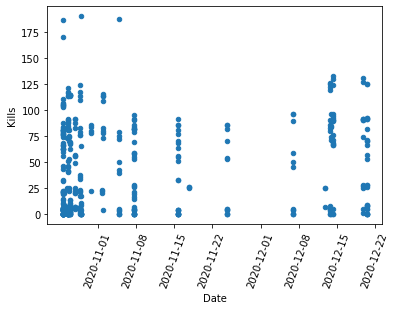

In [5]:
# df_info.loc[df_info['Scenario'] == 'Tile Frenzy'].plot(x="Date", y="Kills", kind='scatter')
df_info.plot(x="Date", y="Kills", kind='scatter', by='Scenario')
plt.xticks(rotation=70)
plt.show()

In [6]:
# scenarios = df_info['Scenario'].unique().tolist()
# widgets.Dropdown(
#     options=scenarios,
#     value='2',
#     description='Scenario:',
#     disabled=False,
# )

In [7]:

# xSize, ySize = len(scenarios)//2, 2
# print(len(scenarios))
# plt.rcParams.update({'font.size': 30})
# plt.figure(figsize=(80,500))
# for i in range(len(scenarios)):
#     plt.xticks(rotation=70)
#     ax = plt.subplot(xSize, ySize, i+1)
#     df_info.loc[df_info['Scenario'] == scenarios[i]].plot(ax=ax, x="Date", y="Score", title=scenarios[i], kind='scatter')
# plt.show()